# About

Numerical plots pertaining to trials of an N-dim Kuramoto system with adaptive delays and introduced injury to the connection topology at midtime. Requires a folder of .mat files from the the following scripts:
 - script_inj.m

Uses the following packages and functions:

# Library

In [1]:
from __future__ import division, print_function

%matplotlib inline
# Toggle on/off
# %matplotlib notebook

import os
import numpy as np
import scipy.io as sio
from scipy import optimize
from scipy import stats
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.transforms as tsfm
import math
from math import pi

from lib import *

from IPython.display import clear_output

# Directories

In [2]:
# Data files
im_folder_p = 'matlab_fig7_np'
im_folder_np = 'matlab_fig7_np'

# Directory
dir_main = os.getcwd()
dir_p = os.path.join(dir_main, 'data', im_folder_p)
dir_np = os.path.join(dir_main, 'data', im_folder_np)

# Import and compile data

## Constant parameters

In [3]:
filenames = os.listdir(dir_p)
dir_sam = os.path.join(dir_p, filenames[0])
dict_mat = sio.loadmat(dir_sam)

# Constant parameters
param = {'N': dict_mat['N'][0,0],
         'g': dict_mat['g'][0,0],
         'omega0': dict_mat['omega0'][0,0],
         # 'gain': dict_mat['gain'][0,0],
         'tf': dict_mat['tf'][0,0],
         'tau0': dict_mat['tau0'][0,0],
         # 'inj': dict_mat['inj'][0,0],
         # 'A': dict_mat['A'],
         't_inj': dict_mat['t_inj'][0,0]
         }

gain = dict_mat['gain'][0,0]
init_freq = dict_mat['init_freq'][0,0]
init_std = dict_mat['std'][0,0]

# Asymptotic percentage
asy = 0.1

## Import plastic arrays

In [4]:
# Setup arrays and variables
files_p = os.listdir(dir_p)

inj_p = []
delta_p = []
Omega_p = []

for i in range(len(files_p)):
    
    dir_file_p = os.path.join(dir_p, files_p[i])
    dict_p = sio.loadmat(dir_file_p)

    # Compile solution dictionary
    sol_p = {'t': np.reshape(dict_p['t'], -1),
             'y': dict_p['y'],
             'yp': dict_p['yp'],
             'tau': dict_p['tau'],
             'taup': dict_p['taup']
            }

    # Injury data
    new_inj = dict_p['inj'][0,0]
    new_A = dict_p['A']
    
    # Get time index ind that is closest to t_inj:
    ind_p = np.max(np.where(sol_p['t'] < param['t_inj']))
    
    # PROCESS DATA
    sol_p2 = {'t': sol_p['t'][ind_p+1:],
              'y': sol_p['y'][ind_p+1:],
              'yp': sol_p['yp'][ind_p+1:],
              'tau': sol_p['tau'][ind_p+1:]
             }

    # Estimate the global frequency:
    arr_omega_p2 = asylib.weight_avg(sol_p2['t'], sol_p2['yp'], asy)
    asy_Omega_p2 = np.sum(arr_omega_p2) / arr_omega_p2.size

    # Frequency variance over time
    Omega_vars_p2 = asylib.weight_avg(sol_p2['t'], (sol_p2['yp'] - asy_Omega_p2)**2, asy)
    Omega_var_p2 = np.mean(Omega_vars_p2)

    # Get array of asymptotic phases:
    arr_lin_p2 = asy_Omega_p2 * sol_p2['t']
    arr_lin_p2 = arr_lin_p2[:,None]

    arr_phases_p2 = sol_p2['y'] - arr_lin_p2
    asy_phases_p2 = asylib.weight_avg(sol_p2['t'], arr_phases_p2, asy)

    # Mod asy_phases:
    asy_phases_p2 = asylib.mod_pi(asy_phases_p2)

    # Phase variance at end times (delta**2 estimate)
    delta2_p2 = np.var(asy_phases_p2)

    # Phase variance over time
    phase_vars_p2 = asylib.weight_avg(sol_p2['t'], (arr_phases_p2 - asy_phases_p2)**2, asy)
    phase_var_p2 = np.mean(phase_vars_p2)

    tau_p2 = sol_p2['tau'][-1]
    
    # STORE DATA
    inj_p.append(new_inj)
    delta_p.append(np.sqrt(delta2_p2))
    Omega_p.append(asy_Omega_p2)

# Convert to arrays
inj_p = np.array(inj_p)
delta_p = np.array(delta_p)
Omega_p = np.array(Omega_p)


# Sort arrays
sort_p = np.argsort(inj_p)

inj_p = inj_p[sort_p]
delta_p = delta_p[sort_p]
Omega_p = Omega_p[sort_p]

## Import non-plastic arrays

In [5]:
# Setup arrays and variables
files_np = os.listdir(dir_np)

inj_np = []
delta_np = []
Omega_np = []

for i in range(len(files_np)):
    
    dir_file_np = os.path.join(dir_np, files_np[i])
    dict_np = sio.loadmat(dir_file_np)

    # Compile solution dictionary
    sol_np = {'t': np.reshape(dict_np['t'], -1),
              'y': dict_np['y'],
              'yp': dict_np['yp'],
              'tau': dict_np['tau'],
              'taup': dict_np['taup']
             }

    # Injury data
    new_inj = dict_np['inj'][0,0]
    new_A = dict_np['A']
    
    # Get time index ind that is closest to t_inj:
    ind_np = np.max(np.where(sol_np['t'] < param['t_inj']))
    
    # PROCESS DATA
    sol_np2 = {'t': sol_np['t'][ind_np+1:],
              'y': sol_np['y'][ind_np+1:],
              'yp': sol_np['yp'][ind_np+1:],
              'tau': sol_np['tau'][ind_np+1:]
             }

    # Estimate the global frequency:
    arr_omega_np2 = asylib.weight_avg(sol_np2['t'], sol_np2['yp'], asy)
    asy_Omega_np2 = np.sum(arr_omega_np2) / arr_omega_np2.size

    # Frequency variance over time
    Omega_vars_np2 = asylib.weight_avg(sol_np2['t'], (sol_np2['yp'] - asy_Omega_np2)**2, asy)
    Omega_var_np2 = np.mean(Omega_vars_np2)

    # Get array of asymptotic phases:
    arr_lin_np2 = asy_Omega_np2 * sol_np2['t']
    arr_lin_np2 = arr_lin_np2[:,None]

    arr_phases_np2 = sol_np2['y'] - arr_lin_np2
    asy_phases_np2 = asylib.weight_avg(sol_np2['t'], arr_phases_np2, asy)

    # Mod asy_phases:
    asy_phases_np2 = asylib.mod_pi(asy_phases_np2)

    # Phase variance at end times (delta**2 estimate)
    delta2_np2 = np.var(asy_phases_np2)

    # Phase variance over time
    phase_vars_np2 = asylib.weight_avg(sol_np2['t'], (arr_phases_np2 - asy_phases_np2)**2, asy)
    phase_var_np2 = np.mean(phase_vars_np2)

    tau_np2 = sol_np2['tau'][-1]
    
    # STORE DATA
    inj_np.append(new_inj)
    delta_np.append(np.sqrt(delta2_np2))
    Omega_np.append(asy_Omega_np2)

# Convert to arrays
inj_np = np.array(inj_np)
delta_np = np.array(delta_np)
Omega_np = np.array(Omega_np)

# Sort arrays
sort_np = np.argsort(inj_np)

inj_np = inj_np[sort_np]
delta_np = delta_np[sort_np]
Omega_np = Omega_np[sort_np]

# Plot

## Options

In [6]:
# Plot positions [left, bottom, width, height] 
bbox0 = [0.1, 0.1, 0.40, 0.8] # Fig 7a: Plot of injured asy. frequency over increasing injury
bbox1 = [0.6, 0.1, 0.40, 0.8] # Fig 7a: Plot of injured asy. delta over increasing injury


# Figure c,d,e,f:
line_opts = {'linewidth': 1.0,
             'alpha': 0.4
            }

omega_opts = {'linewidth': 1.2,
              'linestyle': 'solid',
              'alpha': 0.8,
              'color': 'green'
              }

line_opts2 = {'linewidth': 2.0,
              'alpha': 0.9,
              'color': 'red'
              }

## Generate figure

{'N': 30, 'g': 1.5, 'omega0': 1, 'tf': 300, 'tau0': 2, 't_inj': 150}


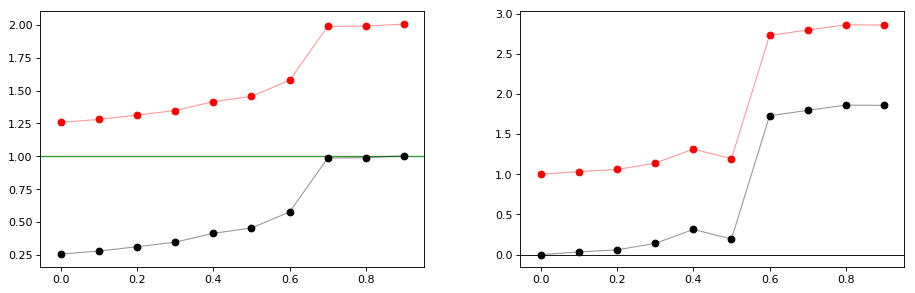

In [7]:
fig, ax = plt.subplots(2, figsize=(12,4), dpi=80)

# Set positions
ax[0].set_position(bbox0)
ax[1].set_position(bbox1)

# Figure A
# ax[0].set_xlim(left=0, right=1)
ax[0].scatter(inj_np, Omega_np, color='black', zorder=1)
ax[0].plot(inj_np, Omega_np, color='black', zorder=0, **line_opts)

ax[0].scatter(inj_np, 1 + Omega_p, color='red', zorder=1)
ax[0].plot(inj_np, 1 + Omega_p, color='red', zorder=0, **line_opts)

ax[0].axhline(y=param['omega0'], zorder=-1, **omega_opts)

# Figure B
# ax[1].set_xlim(left=0, right=1)
ax[1].scatter(inj_np, delta_np, color='black', zorder=1)
ax[1].plot(inj_np, delta_np, color='black', zorder=0, **line_opts)

ax[1].scatter(inj_np, 1 + delta_p, color='red', zorder=1)
ax[1].plot(inj_np, 1 + delta_p, color='red', zorder=0, **line_opts)

ax[1].axhline(y=0, zorder=-1, color='black', linewidth=0.8)

print(param)

## Status

In [8]:
print(Omega_np)

[0.25816514 0.2809678  0.313752   0.34853613 0.41562256 0.45588541
 0.57812499 0.98684148 0.99001055 1.00438838]
